In [1]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: ylabel='Outcome'>

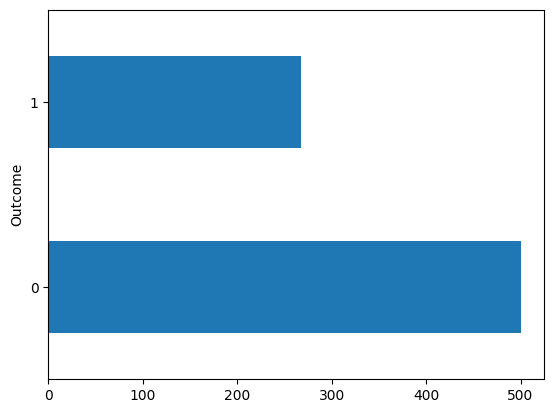

In [2]:
df["Outcome"].value_counts().plot.barh()

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Outcome"])
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

y_pred_binary = (y_pred >= 0.5).astype(int)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Mean Squared Error: 0.24675324675324675
R^2 Score: -0.074747474747475
Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [82]:
import pickle

with open('diabetes_linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [83]:
with open('diabetes_linear_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Example: Using the loaded model for prediction
# Assuming you have new data to predict:
new_data = [[1,85,66,29,0,26.6,0.351,31]]  # Replace with your data
new_data_scaled = loaded_scaler.transform(new_data)
prediction = loaded_model.predict(new_data_scaled)
prediction_binary = (prediction >= 0.5).astype(int)

print(f'Prediction: {prediction}')
print(f'Binary Prediction: {prediction_binary}')

Prediction: [0]
Binary Prediction: [0]


c:\Users\Hari Haran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [45]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 550.5 kB/s eta 0:03:47
   ---------------------------------------- 0.2/124.9 MB 1.2 MB/s eta 0:01:42
   ---------------------------------------- 0.4/124.9 MB 2.2 MB/s eta 0:00:57
   ---------------------------------------- 0.8/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.1/124.9 MB 4.1 MB/s eta 0:00:30
    --------------------------------------- 1.6/124.9 MB 5.1 MB/s eta 0:00:25
    --------------------------------------- 2.3/124.9 MB 6.4 MB/s eta 0:00:20
    --------------------------------------- 2.9/124.9 MB 7.5 MB/s eta 0:00:17
   - -------------------------------------- 3.7/124.9 MB 8.2 MB/s eta 0:00:15
   - -------------------------------------- 4.2/124.9 MB 8.6 MB/s eta 0:00


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
